### **Perceptron Model Training and Evaluation for College Placement with 3D Visualization**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Read the CSV file
df = pd.read_csv('collegePlace.csv')

# Handle categorical features using one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
df = pd.concat([df, pd.DataFrame(ohe.fit_transform(df[['Gender', 'Stream']]).toarray())], axis=1)
df.drop(['Gender', 'Stream'], axis=1, inplace=True)  # Drop original columns

# Explore the data
print(df.shape)
print(df.head())

(2966, 14)
   Age  Internships  CGPA  Hostel  HistoryOfBacklogs  PlacedOrNot    0    1  \
0   22            1     8       1                  1            1  0.0  1.0   
1   21            0     7       1                  1            1  1.0  0.0   
2   22            1     6       0                  0            1  1.0  0.0   
3   21            0     8       0                  1            1  0.0  1.0   
4   22            0     8       1                  0            1  0.0  1.0   

     2    3    4    5    6    7  
0  0.0  0.0  0.0  1.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  


In [ ]:
# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]  # Last column (PlacedOrNot)

# Convert column names to strings
X.columns = X.columns.astype(str)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Perceptron model
p = Perceptron()
p.fit(X_train, y_train)

# Make predictions on the test set
# y_pred = p.predict(X_test)

# Evaluate accuracy using the score method
accuracy = p.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print model coefficients and intercept
print("Coefficients:", p.coef_)
print("Intercept:", p.intercept_)

Accuracy: 1.0
Coefficients: [[   2.  -16.   10.  214.  -51.  -30.  -29.   19. -415. -404. -350. -326.
  -401.]]
Intercept: [-10.]


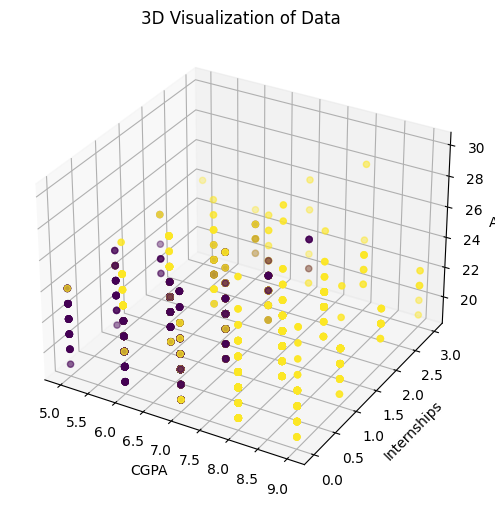

In [ ]:
# 3D Visualization

features_to_visualize = ['CGPA', 'Internships', 'Age']

# Separate selected features and target variable
X_3d = df[features_to_visualize]
y = df['PlacedOrNot']

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded target variable values
ax.scatter(X_3d['CGPA'], X_3d['Internships'], X_3d['Age'], c=y, cmap='viridis')

# Add labels for axes
ax.set_xlabel('CGPA')
ax.set_ylabel('Internships')
ax.set_zlabel('Age')

# Customize plot appearance (optional)
ax.set_title('3D Visualization of Data')

plt.show()